In [7]:
# import pismdata as pdata 
import numpy as np
import netCDF4 as nc
import pyfesom2 as pf
import xarray as xr
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation,TriAnalyzer
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cmocean

def calculate_thk_to_sle(thk, resolution = 20000 ):
    ocean_area = 3.625e14  #m^2
    # resolution = 20000  #m
    rhoice = 910 #kg/m^3
    rhosea = 1028 #kg/m^3
    rr = rhoice/rhosea /ocean_area
    # units: m
    aaa = thk * resolution * resolution * rr 
    sle = np.sum(np.sum(aaa,axis=1), axis=1)
    return sle


def dsle_per_year(data, years):
    from scipy.interpolate import UnivariateSpline

    # Fit a spline to the data
    spl = UnivariateSpline(years, data, s=0)
    # Compute the derivative of the spline
    derivative = spl.derivative()(years)

    return derivative

def kgm2year_to_sv(data, resolution=20000):
    rho = 1000   # kg/m^3
    out = data*resolution*resolution/rho/(365.*24*3600)/1e6
    return out 

In [6]:
path = '/home/a/a270075/ba0989/awiesm2.5/experiments-2/'
exp = 'tran20-24k-new04'
years = np.arange(-24000, 0, 1)

years2 = np.arange(-24000, 0, 100)


thk = np.zeros((len(years2), 600,600))
basal = np.zeros((len(years2), 600,600))
discharge = np.zeros((len(years2), 600,600))
surface = np.zeros((len(years2), 600,600))
calving = np.zeros((len(years2), 600,600))

print(thk.shape)


tt = 140

## read ice sheet mask file
with nc.Dataset('/home/a/a270075/ba0989/pool/pism/grids/mask_pism_ice_sheet_seperate.nc','r') as ff:
    mask = ff.variables['mask'][:]

# with nc.MFDataset(path+exp+'/outdata/pism/*ts*.nc', 'r') as ff:
with nc.MFDataset(path+exp+'/outdata/pism/*_pismr_extra_*.ymonmean.nc', 'r') as ff:
    lon = ff.variables['lon'][:]
    lat = ff.variables['lat'][:]
    thk[:tt,:,:] = ff.variables['thk'][:tt,:,:]
    basal[:tt,:,:] = ff.variables['tendency_of_ice_amount_due_to_basal_mass_flux'][:tt,:,:]
    discharge[:tt,:,:] = ff.variables['tendency_of_ice_amount_due_to_discharge'][:tt,:,:]
    surface[:tt,:,:] = ff.variables['tendency_of_ice_amount_due_to_surface_mass_flux'][:tt,:,:]
    calving[:tt,:,:] = ff.variables['tendency_of_ice_amount_due_to_calving'][:tt,:,:]
    

exp = 'tran20-10k-new04v2'
with nc.MFDataset(path+exp+'/outdata/pism/*_pismr_extra_*.ymonmean.nc', 'r') as ff:
    thk[tt:,:,:] = ff.variables['thk'][:]
    basal[tt:,:,:] = ff.variables['tendency_of_ice_amount_due_to_basal_mass_flux'][:]
    discharge[tt:,:,:] = ff.variables['tendency_of_ice_amount_due_to_discharge'][:]
    surface[tt:,:,:] = ff.variables['tendency_of_ice_amount_due_to_surface_mass_flux'][:]
    calving[tt:,:,:] = ff.variables['tendency_of_ice_amount_due_to_calving'][:]
    


(240, 600, 600)


In [8]:
## LIS  
surface_LIS = np.where( (mask==200), surface, 0)
water_surface_LIS = kgm2year_to_sv(np.sum(np.sum(surface_LIS, axis=1), axis=1))

basal_LIS = np.where( (mask==200), basal, 0)
water_basal_LIS = kgm2year_to_sv(np.sum(np.sum(basal_LIS, axis=1), axis=1))


discharge_LIS = np.where( (mask==200), discharge, 0)
water_discharge_LIS = kgm2year_to_sv(np.sum(np.sum(discharge_LIS, axis=1), axis=1))

calving_LIS = np.where( (mask==200), calving, 0)
water_calving_LIS = kgm2year_to_sv(np.sum(np.sum(calving_LIS, axis=1), axis=1))

## EIS  
surface_EIS = np.where( (mask==400), surface, 0)
water_surface_EIS = kgm2year_to_sv(np.sum(np.sum(surface_EIS, axis=1), axis=1))

basal_EIS = np.where( (mask==400), basal, 0)
water_basal_EIS = kgm2year_to_sv(np.sum(np.sum(basal_EIS, axis=1), axis=1))


discharge_EIS = np.where( (mask==400), discharge, 0)
water_discharge_EIS = kgm2year_to_sv(np.sum(np.sum(discharge_EIS, axis=1), axis=1))

calving_EIS = np.where( (mask==400), calving, 0)
water_calving_EIS = kgm2year_to_sv(np.sum(np.sum(calving_EIS, axis=1), axis=1))



## CIS  
surface_CIS = np.where( (mask==300), surface, 0)
water_surface_CIS = kgm2year_to_sv(np.sum(np.sum(surface_CIS, axis=1), axis=1))

basal_CIS = np.where( (mask==300), basal, 0)
water_basal_CIS = kgm2year_to_sv(np.sum(np.sum(basal_CIS, axis=1), axis=1))


discharge_CIS = np.where( (mask==300), discharge, 0)
water_discharge_CIS = kgm2year_to_sv(np.sum(np.sum(discharge_CIS, axis=1), axis=1))

calving_CIS = np.where( (mask==300), calving, 0)
water_calving_CIS = kgm2year_to_sv(np.sum(np.sum(calving_CIS, axis=1), axis=1))

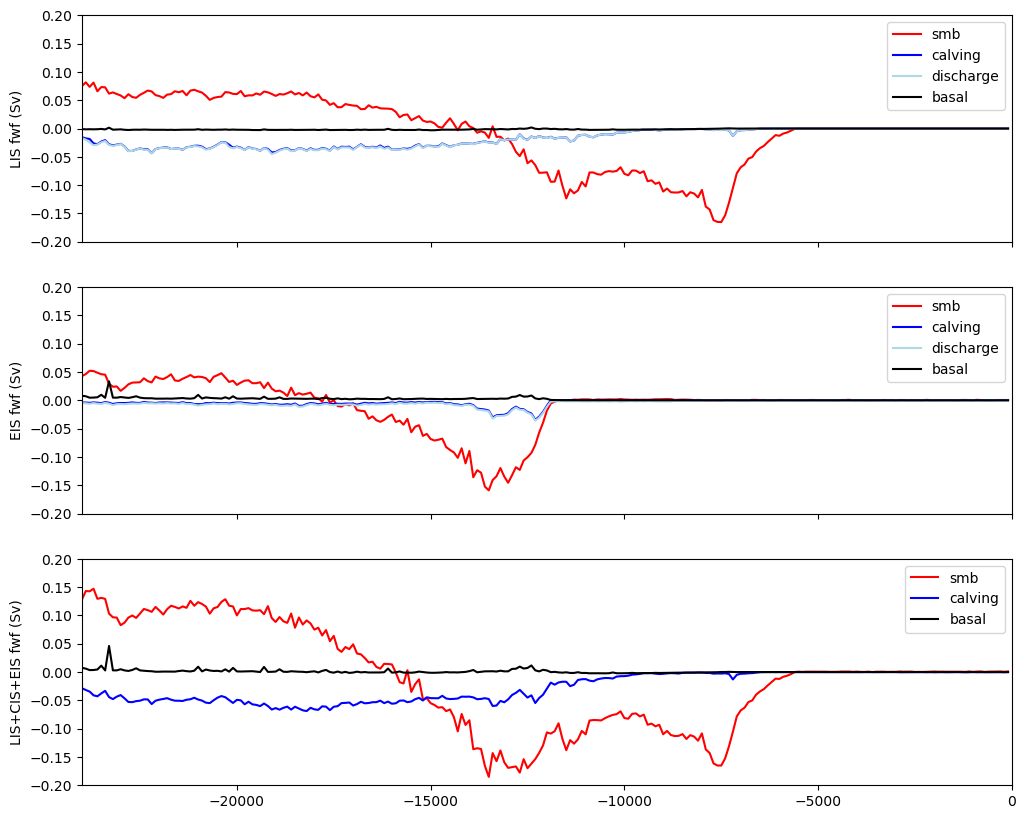

In [18]:
## plotting ####
fig, axs = plt.subplots(3,1, sharex=True, figsize=(12,10))

axs[0].plot(years2, water_surface_LIS, label='smb',color='red') 
axs[0].plot(years2, water_calving_LIS, label='calving',color='blue')
axs[0].plot(years2, water_discharge_LIS, label='discharge',color='lightblue')
axs[0].plot(years2, water_basal_LIS, label='basal',color='black')
axs[0].legend()

axs[0].set_xlim(-24000, 0)
axs[0].set_ylim(-0.2, 0.2)
axs[0].set_ylabel("LIS fwf (Sv)", fontsize=10)

axs[1].plot(years2, water_surface_EIS, label='smb',color='red') 
axs[1].plot(years2, water_calving_EIS, label='calving',color='blue')
axs[1].plot(years2, water_discharge_EIS, label='discharge',color='lightblue')
axs[1].plot(years2, water_basal_EIS, label='basal',color='black')
axs[1].legend()

axs[1].set_xlim(-24000, 0)
axs[1].set_ylim(-0.2, 0.2)
axs[1].set_ylabel("EIS fwf (Sv)", fontsize=10)

total_surface = water_surface_LIS + water_surface_EIS + water_surface_CIS 
total_calving = water_calving_LIS + water_calving_EIS + water_calving_CIS
total_basal = water_basal_LIS + water_basal_EIS + water_basal_CIS

axs[2].plot(years2, total_surface, label='smb',color='red') 
axs[2].plot(years2, total_calving, label='calving',color='blue')
axs[2].plot(years2, total_basal, label='basal',color='black')
axs[2].legend()

axs[2].set_xlim(-24000, 0)
axs[2].set_ylim(-0.2, 0.2)
axs[2].set_ylabel("LIS+CIS+EIS fwf (Sv)", fontsize=10)

plt.savefig('2_freshwater_budget.png',bbox_inches='tight',)

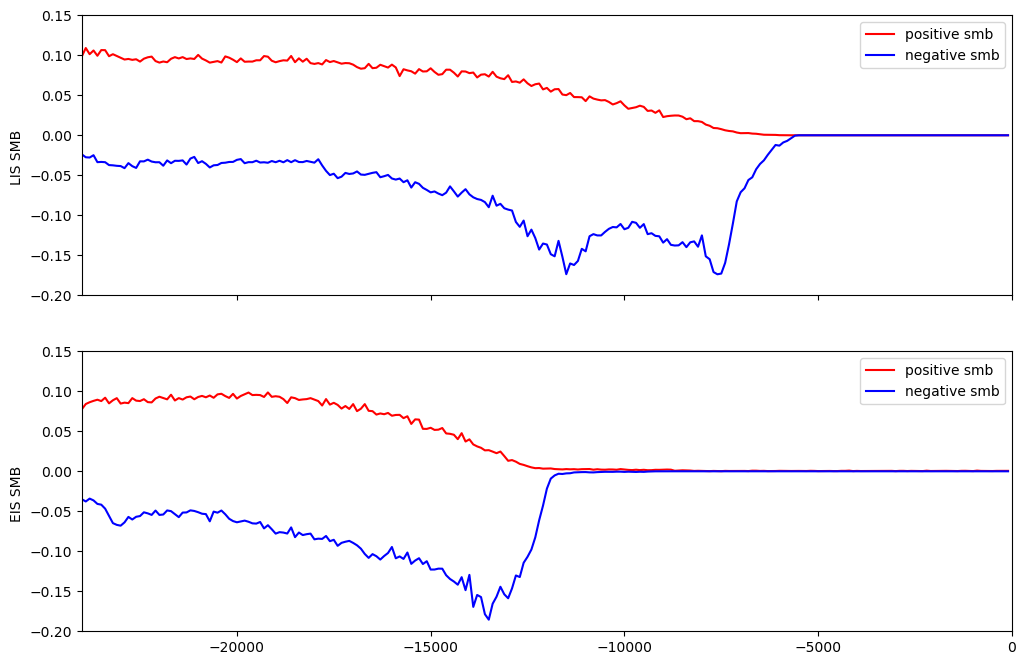

In [19]:
data = np.where(surface_LIS>0., surface_LIS, 0. )
positive_LIS = kgm2year_to_sv(np.sum(np.sum(data, axis=1), axis=1))
data = np.where(surface_LIS<0., surface_LIS, 0. )
negative_LIS = kgm2year_to_sv(np.sum(np.sum(data, axis=1), axis=1))

data = np.where(surface_EIS>0., surface_EIS, 0. )
positive_EIS = kgm2year_to_sv(np.sum(np.sum(data, axis=1), axis=1))
data = np.where(surface_EIS<0., surface_EIS, 0. )
negative_EIS = kgm2year_to_sv(np.sum(np.sum(data, axis=1), axis=1))



## plotting ####
fig, axs = plt.subplots(2,1, sharex=True, figsize=(12,8))
axs[0].plot(years2, positive_LIS, label='positive smb',color='red') 
axs[0].plot(years2, negative_LIS, label='negative smb',color='blue')
axs[0].legend()
axs[0].set_xlim(-24000, 0)
axs[0].set_ylim(-0.2, 0.15)
axs[0].set_ylabel("LIS SMB ", fontsize=10)

axs[1].plot(years2, positive_EIS, label='positive smb',color='red') 
axs[1].plot(years2, negative_EIS, label='negative smb',color='blue')
axs[1].legend()
axs[1].set_xlim(-24000, 0)
axs[1].set_ylim(-0.2, 0.15)
axs[1].set_ylabel("EIS SMB ", fontsize=10)

plt.savefig('2_freshwater_SMB.png')